## INF-578. Machine Learning. Tarea 2.
# Métodos Lineales para Clasificación

## Álvaro Salinas -  Camilo Valenzuela

## 17 de Noviembre de 2017

### Tabla de Contenidos

* [Librerías Necesarias](#libs)
* [Pregunta 1](#1)
    * [1.a](#1a)
    * [1.b](#1b)
    * [1.c](#1c)
    * [1.d](#1d)
    * [1.e](#1e)
    * [1.f](#1f)
    * [1.g](#1g)
    * [1.h](#1h)
    * [1.i](#1i)
* [Pregunta 2](#2)
    * [2.a](#2a)
    * [2.b](#2b)
    * [2.c](#2c)
    * [2.d](#2d)
    * [2.e](#2e)
    * [2.f](#2f)
    * [2.g](#2g)
* [Pregunta 3](#3)
    * [3.a](#3a)
    * [3.b](#3b)
    * [3.c](#3c)
    * [3.d](#3d)
    * [3.e](#3e)
    * [3.f](#3f)
    * [3.g](#3g)

<div id='libs' />
### Librerías necesarias

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

<div id='1' />
### 1. Reducción de Dimensionalidad para Clasificación

<div id='1a' />
##### (a) Construya un dataframe con los datos a analizar descargando los datos desde la URL. Determine cuántos registros contiene el conjunto de entrenamiento y cuántos el conjunto de pruebas. Determine además el número promedio de palabras por ítem en cada clase.

Este dataset esta compuesto por registros que representan la digitalización de señales producidas por speakers pronunciando vocales. Cada speaker pronuncia $6$ veces cada una de las $11$ vocales. De esta forma, el conjunto de entrenamiento, generado por los datos de $8$ speakers, contiene $6 \times 11 \times 8 = 528$ ejemplos, mientras el conjunto de prueba, con $7$ speakers, posee $6 \times 11 \times 7 = 462$ registros.

No se logra comprender la pregunta sobre el "número promedio de palabras por ítem en cada clase", dado que cada clase representa los parámetros log area relacionados a los coeficientes de reflexión que describen la señal de audio.

In [6]:
import urllib
import pandas as pd
train_data_url = "http://statweb.stanford.edu/~hastie/ElemStatLearn/datasets/vowel.train"
test_data_url = "http://statweb.stanford.edu/~hastie/ElemStatLearn/datasets/vowel.test"
train_data_f = urllib.urlretrieve(train_data_url, "train_data.csv")
test_data_f = urllib.urlretrieve(test_data_url, "test_data.csv")
train_df = pd.DataFrame.from_csv('train_data.csv',header=0,index_col=0)
test_df = pd.DataFrame.from_csv('test_data.csv',header=0,index_col=0)

In [7]:
train_df.tail()

,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,,
524,7,-4.065,2.876,-0.856,-0.221,-0.533,0.232,0.855,0.633,-1.452,0.272
525,8,-4.513,4.265,-1.477,-1.090,0.215,0.829,0.342,0.693,-0.601,-0.056
526,9,-4.651,4.246,-0.823,-0.831,0.666,0.546,-0.300,0.094,-1.343,0.185
527,10,-5.034,4.993,-1.633,-0.285,0.398,0.181,-0.211,-0.508,-0.283,0.304
528,11,-4.261,1.827,-0.482,-0.194,0.731,0.354,-0.478,0.050,-0.112,0.321


In [5]:
test_df.tail()

,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,,
458,7,-3.239,3.083,-1.427,-0.202,-0.282,1.421,0.576,0.068,-0.914,0.147
459,8,-3.753,3.605,-0.899,-0.747,-0.401,1.765,0.620,0.754,-0.835,-0.301
460,9,-3.980,2.459,0.068,0.023,0.237,1.029,-0.189,0.521,-0.773,-0.500
461,10,-4.264,2.925,0.065,0.794,0.323,0.515,-1.282,-0.140,-0.863,-0.390
462,11,-3.291,2.324,-0.679,0.285,0.441,0.557,-0.227,0.115,-1.046,0.697


<div id='1b' />
##### (b) Construya matrices $X$ e $y$ que contengan las características y las etiquetas correspondientes a los datos de entrenamiento y pruebas. Normalice apropiadamente los datos antes de empezar a trabajar.

In [11]:
from sklearn.preprocessing import StandardScaler
X = train_df.loc[:,'x.1':'x.10'].values
y = train_df.loc[:,'y'].values
Scaler = StandardScaler().fit(X)
X_std = Scaler.transform(X)

<div id='1c' />
##### (c) Utilizando PCA genere una representación en 2 dimensiones de la data original (10 dimensiones) identificando cada clase con un color distinto (elija una paleta apropiada).

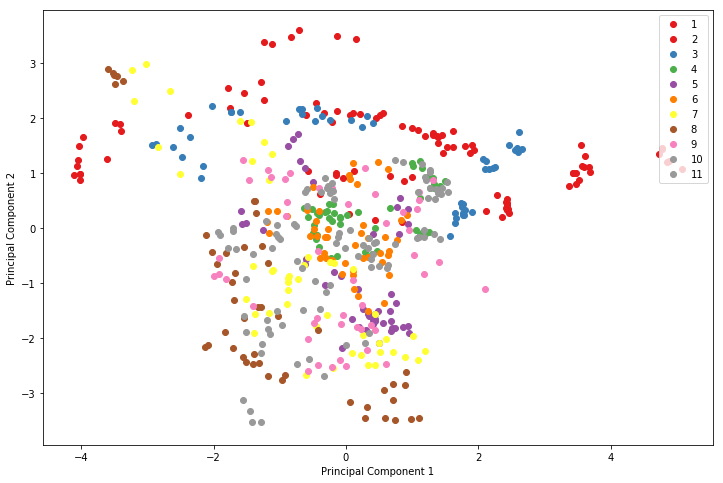

In [29]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
sklearn_pca = PCA(n_components=2)
Xred_pca = sklearn_pca.fit_transform(X_std)
cmap = plt.cm.get_cmap('Set1')
mclasses=(1,2,3,4,5,6,7,8,9,10,11)
mcolors = [cmap(i) for i in np.linspace(0,1,11)]
plt.figure(figsize=(12, 8))
for lab, col in zip(mclasses,mcolors):
    plt.scatter(Xred_pca[y==lab, 0],Xred_pca[y==lab, 1],label=lab,c=col)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

<div id='1d' />
##### (d) Utilizando LDA genere una representación en 2 dimensiones de la data original (10 dimensiones) identificando cada clase con un color distinto (elija una paleta apropiada).

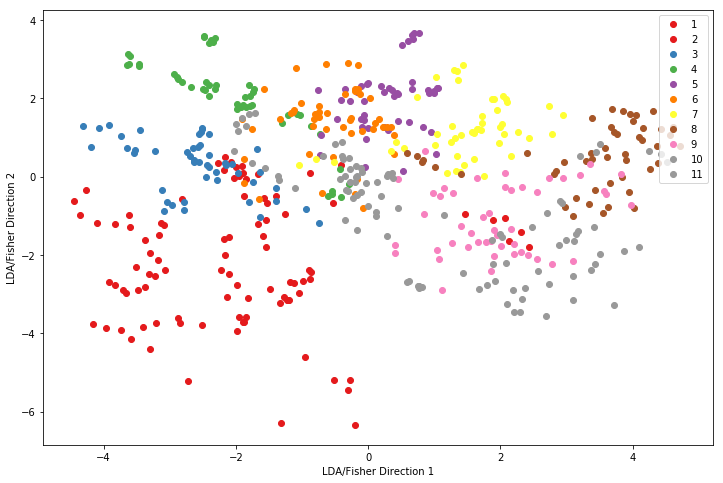

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
sklearn_lda = LDA(n_components=2)
Xred_lda = sklearn_lda.fit_transform(X_std,y)
cmap = plt.cm.get_cmap('Set1')
mclasses=(1,2,3,4,5,6,7,8,9,10,11)
mcolors = [cmap(i) for i in np.linspace(0,1,11)]
plt.figure(figsize=(12, 8))
for lab, col in zip(mclasses,mcolors):
    plt.scatter(Xred_lda[y==lab, 0],Xred_lda[y==lab, 1],label=lab,c=col)
plt.xlabel('LDA/Fisher Direction 1')
plt.ylabel('LDA/Fisher Direction 2')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

<div id='1e' />
##### (e) Compare cualitativamente los resultados obtenidos en c y d.

Es posible apreciar que el problema dimensionalmente reducido sigue siendo bastante complejo de abordar, pues las $2$ componentes mostradas tanto con PCA como con LDA presentan datos muy dispersos y linealmente no separables. De todas formas, se logra apreciar un mejor comportamiento en el caso de LDA, en donde las clases sí logran distinguirse de mejor manera.

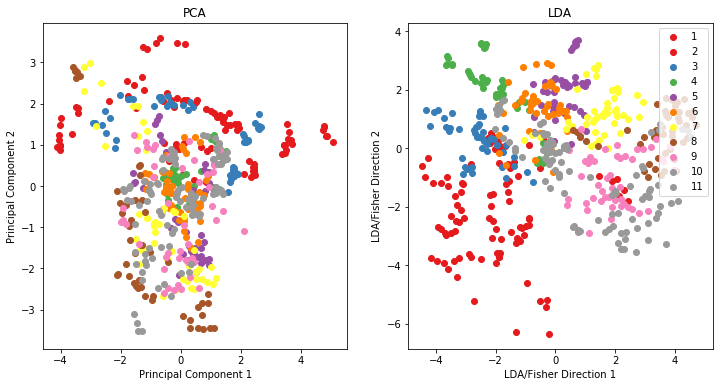

In [36]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
for lab, col in zip(mclasses,mcolors):
    ax1.scatter(Xred_pca[y==lab, 0],Xred_pca[y==lab, 1],label=lab,c=col)
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.set_title('PCA')
for lab, col in zip(mclasses,mcolors):
    ax2.scatter(Xred_lda[y==lab, 0],Xred_lda[y==lab, 1],label=lab,c=col)
ax2.set_xlabel('LDA/Fisher Direction 1')
ax2.set_ylabel('LDA/Fisher Direction 2')
ax2.set_title('LDA')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

Como aporte, quisimos agregar un tercer método de reducción de dimensionalidad para problemas de clasificación. Este es un método bastante reciente (año 2008, a manos de L. van der Maaten y G. Hinton), y se denomina t-Distributed Stochastic Neighbor Embedding, o simplemente t-SNE. Ha demostrado ser bastante robusto ante una gran variedad de problemas y al probarlo con este dataset podemos ver como las clases se encuentran mucho más agrupadas, a pesar de que tampoco se presenta una separabilidad lineal clara.

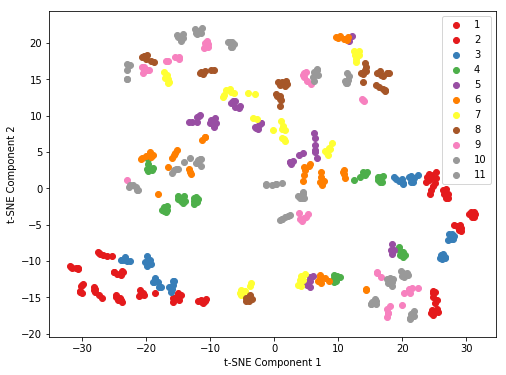

In [37]:
from sklearn.manifold import TSNE
X_tsne = TSNE(n_components=2,init='random').fit_transform(X_std)
cmap = plt.cm.get_cmap('Set1')
mclasses=(1,2,3,4,5,6,7,8,9,10,11)
mcolors = [cmap(i) for i in np.linspace(0,1,11)]
plt.figure(figsize=(8, 6))
for lab, col in zip(mclasses,mcolors):
    plt.scatter(X_tsne[y==lab, 0],X_tsne[y==lab, 1],label=lab,c=col)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

<div id='1f' />
##### (f) Construya un clasificador que determine la clase de un dato $x$ aleatoriamente sin considerar las características sino que solamente la probabilidad a-priori de cada clase. Por ejemplo, si la clase $y = 0$ ocurre el $25\%$ de las veces, su clasificador debe predecir esta clase para un determinado $x$ con probabilidad $0.25$, independiente de los atributos de $x$.

Para esto se recurrió a la función randint del módulo numpy.random. Esta función entrega un entero a partir de una distribución uniforme discreta, por lo que si este entero corresponde a un índice del array de clases, cada clase tendrá una probabilidad de ser seleccionada igual a su porcentaje de ocurrencia, como se pide en el enunciado.

De todas formas, esto se implementó pensando en un problema genérico, ya que en este caso particular, cada clase aparece $48$ veces en el conjunto de entrenamiento. Teniendo todas las clases la misma probabilidad de $\frac{1}{11}$, bastaría con elegir aleatoriamente una de ellas.

In [23]:
def Random_Classifier(y):
    label_index = np.random.randint(len(y))
    return y[label_index]

<div id='1g' />
##### (g) Compare el desempeño de LDA, QDA y un modelo de Vecinos Más Cercanos ($k$-NN) sin reducir dimensionalidad. ¿Qué técnica se comporta mejor sobre el conjunto de entrenamiento? ¿Sobre el conjunto de pruebas? Describa, utilizando un gráfico, el efecto de cambiar el parámetro de $k$ en el tercer modelo.

In [ ]:
from sklearn.lda import LDA
from sklearn.qda import QDA
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
Xtest = test_df.loc[:,'x.1':'x.10'].values
ytest = test_df.loc[:,'y'].values
X_std_test = Scaler.transform(Xtest)
lda_model = LDA()
lda_model.fit(X_std,y)
print "-----LDA-----"
print lda_model.score(X_std,y)
print lda_model.score(X_std_test,ytest)
qda_model = QDA()
qda_model.fit(X_std,y)
print "-----QDA-----"
print qda_model.score(X_std,y)
print qda_model.score(X_std_test,ytest)
print "-----KNN-----"
knn_scores_training = []
knn_scores_testing = []
k = range(1,51)
for c in k:
    knn_model = KNeighborsClassifier(n_neighbors=c)
    knn_model.fit(X_std,y)
    knn_scores_training.append(knn_model.score(X_std,y))
    knn_scores_testing.append(knn_model.score(X_std_test,ytest))
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.xlabel("k")
plt.ylabel("Score")
plt.title("Training/Testing")
plt.plot(k,knn_scores_training, '-o',k,knn_scores_testing, '-o')
plt.legend(("Training", "Testing"), loc = "upper right")
plt.show()

<div id='1h' />
##### (h) Utilice PCA para generar una representación de la data en $d' = 1, 2, 3, \dots , 10$ dimensiones. Para cada caso entrene un modelo LDA, QDA y de $k$-NN. Construya un gráfico que muestre cómo evoluciona el error de entrenamiento versus $d'$. Sobreponga a este gráfico el error de pruebas versus $d'$. Concluya.

<div id='1i' />
##### (i) Utilice LDA para generar una representación de la data en $d' = 1, 2, 3, \dots , 10$ dimensiones. Para cada caso entrene un modelo LDA, QDA y de $k$-NN. Construya un gráfico que muestre cómo evoluciona el error de entrenamiento versus $d'$. Sobreponga a este gráfico el error de pruebas versus $d'$. Concluya.

<div id='2' />
### 2. Análisis de Opiniones sobre Películas

<div id='2a' />
##### (a) Construya un dataframe con los datos a analizar descargando los datos desde la URL local. Determine cuántos registros de cada clase contiene el conjunto de entrenamiento y cuántos el conjunto de pruebas.

In [ ]:
import urllib
import pandas as pd
train_data_url = "http://www.inf.utfsm.cl/~jnancu/stanford-subset/polarity.train"
test_data_url = "http://www.inf.utfsm.cl/~jnancu/stanford-subset/polarity.dev"
train_data_f = urllib.urlretrieve(train_data_url, "train_data.csv")
test_data_f = urllib.urlretrieve(test_data_url, "test_data.csv")
ftr = open("train_data.csv", "r")
fts = open("test_data.csv", "r")
rows = [line.split(" ",1) for line in ftr.readlines()]
train_df = pd.DataFrame(rows, columns=['Sentiment','Text'])
train_df['Sentiment'] = pd.to_numeric(train_df['Sentiment'])
rows = [line.split(" ",1) for line in fts.readlines()]
test_df = pd.DataFrame(rows, columns=['Sentiment','Text'])
test_df['Sentiment'] = pd.to_numeric(test_df['Sentiment'])
print train_df.shape
print test_df.shape

<div id='2b' />
##### (b) Construya una función, denominada word_extractor, que devuelva una lista de las palabras contenidas en un determinado un trozo de texto. Incorpore en su función las operaciones de lower-casing y stemming. Pruebe la función con las frases sugeridas en el código, invente otras similares y comente. Compare con los resultados obtenidos si no se hace stemming.

In [ ]:
import re, time
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize
from nltk.stem.porter import PorterStemmer
def word_extractor(text):
    ps = PorterStemmer()
    commonwords = stopwords.words('english')
    commonwords.remove("not")
    text = re.sub(r'([a-z])\1+', r'\1\1',text)
    words = ""
    wordtokens = [ ps.stem(word.lower()) for word in word_tokenize(text.decode('utf-8', 'ignore')) ]
    for word in wordtokens:
        if word not in commonwords:
            words+=" "+word
    return words
print word_extractor("I love to eat cake")
print word_extractor("I love eating cake")
print word_extractor("I loved eating the cake")
print word_extractor("I do not love eating cake")
print word_extractor("I don't love eating cake")

<div id='2c' />
##### (c) Construya una función, denominada word_extractor2, análoga a la función anterior, pero que lematice las palabras en vez de hacer stemming. Pruebe la función con las frases sugeridas en el código anterior y discuta las diferencias que observa.

In [ ]:
def word_extractor2(text):
    wordlemmatizer = WordNetLemmatizer()
    commonwords = stopwords.words('english')
    commonwords.remove("not")
    text = re.sub(r'([a-z])\1+', r'\1\1',text)
    words = ""
    wordtokens = [ wordlemmatizer.lemmatize(word.lower()) for word in word_tokenize(text.decode('utf-8','ignore')) ]
    for word in wordtokens:
        if word not in commonwords:
            words+=" "+word
    return words

<div id='2d' />
##### (d) Utilizando la función CountVectorizer de la librería sklearn y de acuerdo a las directrices mencionadas en la introducción, genere una representación vectorial del texto de entrenamiento y del conjunto que usaremos para realizar pruebas. Explore el vocabulario utilizado y determine cuáles son las palabras más frecuentes en el conjunto de entrenamiento y pruebas.

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
texts_train = [word_extractor2(text) for text in train_df.Text]
texts_test = [word_extractor2(text) for text in test_df.Text]
vectorizer = CountVectorizer(ngram_range=(1, 1), binary='False')
vectorizer.fit(np.asarray(texts_train))
features_train = vectorizer.transform(texts_train)
features_test = vectorizer.transform(texts_test)
labels_train = np.asarray((train_df.Sentiment.astype(float)+1)/2.0)
labels_test = np.asarray((test_df.Sentiment.astype(float)+1)/2.0)
vocab = vectorizer.get_feature_names()
dist=list(np.array(features_train.sum(axis=0)).reshape(-1,))
for tag, count in zip(vocab, dist):
    print count, tag

<div id='2e' />
##### (e) Construya una función que evalúe el desempeño obtenido por un clasificador genérico en el conjunto de entrenamiento y en el conjunto de pruebas. Utilice y explique las métricas que calcula la función classification_report de la librería sklearn.

In [ ]:
from sklearn.metrics import classification_report
def score_the_model(model,x,y,xt,yt,text):
    acc_tr = model.score(x,y)
    acc_test = model.score(xt[:-1],yt[:-1])
    print "Training Accuracy %s: %f"%(text,acc_tr)
    print "Test Accuracy %s: %f"%(text,acc_test)
    print "Detailed Analysis Testing Results ..."
    print(classification_report(yt, model.predict(xt), target_names=['+','-']))

<div id='2f' />
##### (f) Construya una función que entrene/ajuste un clasificador Bayesiano Ingenuo (Binario) (las características no nulas serán tratadas como 1) y mida el error de predicción obtenido sobre los datos de entrenamiento y pruebas. Utilice esta función con las características extraídas en el punto (d). Mida el efecto de filtrar stopwords y de eliminar este paso de pre-procesamiento típico. Determine además, qué representación obtiene un mejor resultado: si aquella obtenida vía lematización o aquella obtenida vía stemming. Finalmente, tome un subconjunto aleatorio de los textos de prueba y analice las predicciones del modelo (explore las predicciones, así como las probabilidades que el clasificador asigna a cada clase).

In [ ]:
from sklearn.naive_bayes import BernoulliNB
import random
def do_NAIVE_BAYES(x,y,xt,yt):
    model = BernoulliNB()
    model = model.fit(x, y)
    score_the_model(model,x,y,xt,yt,"BernoulliNB")
    return model
model=do_NAIVE_BAYES(features_train,labels_train,features_test,labels_test)
test_pred = model.predict_proba(features_test)
spl = random.sample(xrange(len(test_pred)), 15)
for text, sentiment in zip(test_df.Text[spl], test_pred[spl]):
    print sentiment, text

<div id='2g' />
##### (g) Construya una función que entrene/ajuste una Máquina de Vectores de Soporte (SVM) Lineal y mida el error de predicción obtenido sobre los datos de entrenamiento y pruebas. Incluya en su función la exploración de diferentes valores del parámetro de regularización C. Discuta el significado y efecto esperado de este parámetro. Utilice la función construida con los atributos extraídos en el punto (d). Mida el efecto de filtrar stopwords y de eliminar este paso de pre-procesamiento típico. Determine además, qué representación obtiene un mejor resultado: si aquella obtenida vía lematización o aquella obtenida vía stemming. Finalmente, tome un subconjunto aleatorio de los textos de prueba y analice las predicciones del modelo (explore las predicciones, así como las probabilidades que el clasificador asigna a cada clase).

In [ ]:
from sklearn.svm import LinearSVC
def do_SVM(x,y,xt,yt):
    Cs = [0.01,0.1,10,100,1000]
    for C in Cs:
        print "C Value: %f"%C
        model = LinearSVC(C=C)
        model = model.fit(x, y)
        score_the_model(model,x,y,xt,yt,"SVM")
do_SVM(features_train,labels_train,features_test,labels_test)

<div id='3' />
###  3. Fraude en transacciones bancarias

<div id='3a' />
##### (a) Descargue y cargue el archivo, genere un gráfico que compare la cantidad de elementos que hay por clase.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
dt = pd.read_csv("creditcard.csv",header = 0)
sns.countplot("Class",data=dt)
plt.show()

<div id='3b' />
#####  (b) Estandarice el monto de la transacción. ¿Por qué solo estandarizamos un atributo?

In [ ]:
from sklearn.preprocessing import StandardScaler
dt["nAmount"] = StandardScaler().fit_transform(dt['Amount'].values.reshape(-1, 1))
dt.drop(["Time","Amount"],axis=1,inplace=True)
dt.head()

<div id='3c' />
##### (c) Defina una función que reciba como input un modelo, los datos de entrenamiento y datos de testeo. Esta función deberá mostrar luego de generar el modelo y haber probado la data de testing una matriz de confusión, junto a sus respectivas métricas. Deberá además mostrar una curva ROC junto al valor del área bajo la curva de esta. Finalmente, responda las siguientes preguntas ¿Qué es una matriz de confusión? ¿Qué métricas se pueden calcular de ésta y cuáles nos serán útiles en este experimento? ¿Qué es una curva ROC y qué relación tiene con la matriz de confusión?

In [ ]:
def model(model,features_train,features_test,labels_train,labels_test):
    clf = model
    clf.fit(features_train,labels_train.values.ravel())
    pred=clf.predict(features_test)
    cnf_matrix=confusion_matrix(labels_test,pred)
    print "The recall for this model is: %f"%(float(cnf_matrix[1,1])/(cnf_matrix[1,1]+cnf_matrix[1,0]))
    fig= plt.figure(figsize=(6,3))
    print "TP: %d"%cnf_matrix[1,1,]
    print "TN: %d"%cnf_matrix[0,0]
    print "FP: %d"%cnf_matrix[0,1]
    print "FN: %d"%cnf_matrix[1,0]
    sns.heatmap(cnf_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_class")
    plt.ylabel("Real class")
    plt.show()
    print "\n----------Classification Report------------------------------------"
    print classification_report(labels_test,pred)
    ''' You have to complete this function, ROC Curve is missing'''

<div id='3d' />
##### (d) Defina una función que genere un Training y Testing Set de un Dataset cualquiera. Indique qué está haciendo la función.

In [ ]:
from sklearn.model_selection import train_test_split
def data_prepration(x):
    x_features= x.iloc[:,x.columns != "Class"]
    x_labels=x.iloc[:,x.columns=="Class"]
    x_train,x_test,y_train,y_test=train_test_split(x_features,x_labels,test_size=0.3)
    print "Length of training data: %d"%len(x_train)
    print "Length of test data: %d"%len(x_test)
    return(x_train,x_test,y_train,y_test)

<div id='3e' />
##### (e) Defina una función que realice Undersample. ¿Explique en que consiste esta técnica?

In [ ]:
def undersample(data,times):
    fraud_indices= np.array(data[data.Class==1].index)
    normal_indices = np.array(data[data.Class==0].index)
    Count_Normal_transacation = len(data[data["Class"]==0])
    Count_Fraud_transacation = len(data[data["Class"]==1])
    Normal_indices_undersample = np.array(np.random.choice(normal_indices,(times*Count_Fraud_transacation),replace=False))
    undersample_data= np.concatenate([fraud_indices,Normal_indices_undersample])
    undersample_data = data.iloc[undersample_data,:]
    normal = (float(len(undersample_data[undersample_data.Class==0]))/len(undersample_data["Class"]))
    print "The normal transacation proportion is : %f"%normal
    fraud = (float(len(undersample_data[undersample_data.Class==1]))/len(undersample_data["Class"]))
    print "The fraud transacation proportion is : %f"%fraud
    return(undersample_data)

<div id='3f' />
##### (f) Genere un modelo de Logistic Regression y otro a su elección utilizando UnderSample. Concluya a partir de los resultados.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report
x_tr,x_ts,y_tr,y_ts = data_prepration(dt)
x_tr["Class"] = y_tr["Class"]
x_tr = x_tr.reset_index(drop=True)
for i in range(1,4):
    print "The undersample data for " + str(i) + " proportion\n"
    Undersample_data = undersample(x_tr,i)
    print "\n----------------------Validation Set------------------------"
    print "\nThe model classification for " + str(i) + " proportion\n"
    under_x,under_xt,under_yx,under_yxt=data_prepration(Undersample_data)
    clf=LogisticRegression()
    model(clf,under_x,under_xt,under_yx,under_yxt)
    print "--------------------------Testing Set---------------------------"
    model(clf,under_x,x_ts,under_yx,y_ts)
    print "---------------------------------------------------------------"

<div id='3g' />
##### (g) Vuelva a realizar los puntos (e) y (f), esta vez utilizando OverSampling y SMOTE (Hint: Para SMOTE usted puede apoyarse de la librería imblearn).

In [ ]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
os_data_X,os_data_y=os.fit_sample(x_tr,y_tr)